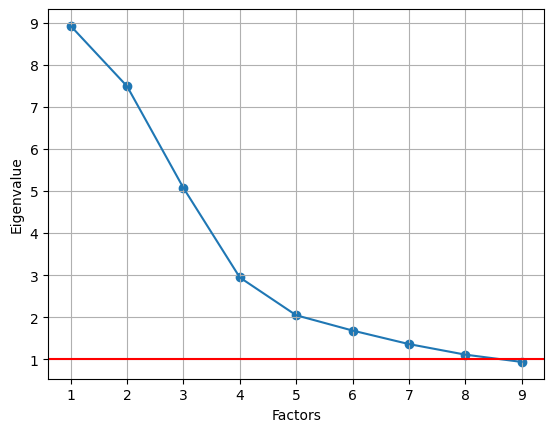

In [15]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

train_df = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\updated_features\csv_for_rulefit\train_logP_v3.csv', index_col=0)
test_df = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\updated_features\csv_for_rulefit\test_logP_v3.csv', index_col=0)

merged_dataframe = pd.concat([train_df, test_df], axis=0)

features_to_analyse = []
for feature_name in merged_dataframe.columns:
    if len(merged_dataframe[feature_name].unique()) != 1:
        features_to_analyse.append(feature_name)
features_to_analyse.remove('fold_id')

fa = FactorAnalyzer(rotation=None)

df_features = merged_dataframe[features_to_analyse]
# df_features = StandardScaler().fit_transform(df_features)
fa.fit(df_features)

ev, _ = fa.get_eigenvalues()
for index, en_value in enumerate(ev):
    if en_value < 1:
        break
index += 1

plt.scatter(range(1, index + 1), ev[:index])
plt.plot(range(1, index + 1), ev[:index])
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y = 1, color='r')
plt.grid()
plt.show()

In [7]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(df_features)
kmo_model

c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.49089938013343887

In [27]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

df_for_bartlett_sphericity = StandardScaler().fit_transform(df_features)
chi_square_value, p_value = calculate_bartlett_sphericity(df_for_bartlett_sphericity)
print(f"statistics: {chi_square_value}, p-value: {p_value}")

statistics: 33195.52628459009, p-value: 0.0


In [28]:
from sklearn.preprocessing import StandardScaler

n_factors = 10

fa = FactorAnalyzer(n_factors=n_factors, rotation="varimax")

fa.fit(df_features)

fa_load = pd.DataFrame(fa.loadings_,index=df_features.columns)
fa_load.style.background_gradient(cmap="coolwarm")

,0,1,2,3,4,5,6,7,8,9
nC,0.130589,0.461576,0.858741,0.033544,-0.018805,0.018009,-0.092380,0.037501,-0.075332,0.125761
FPSA3,-0.167078,-0.057031,-0.413418,0.084287,-0.768837,-0.099588,-0.009711,-0.147850,0.087473,0.146752
nFARing,-0.123377,0.934147,0.134211,0.041800,0.028764,-0.031169,0.168951,-0.019084,-0.112378,0.039103
RPCS,-0.129812,-0.031398,-0.107821,0.221139,-0.734416,-0.113794,0.105814,0.005648,-0.033270,0.143086
dipole_moment,0.050198,-0.068149,0.030663,0.130976,0.280957,-0.070542,0.101901,-0.037578,0.108571,0.055937
angle_R1X1R2,0.982230,-0.024990,0.025046,0.050114,0.088322,0.026045,0.061971,0.042147,0.087839,0.012235
nFAHRing,-0.110133,0.891538,0.133902,0.099618,0.004165,-0.023993,-0.159968,-0.104222,0.133836,-0.041111
angle_X2X1R1,0.975855,-0.025758,0.020037,0.066929,0.085305,0.057890,0.018800,0.037359,0.076846,-0.045454
nFHRing,-0.110133,0.891538,0.133902,0.099618,0.004165,-0.023993,-0.159968,-0.104222,0.133836,-0.041111
chirality,0.103722,0.074649,-0.054830,-0.090911,-0.006607,-0.003784,0.803142,0.042850,-0.122385,-0.037818


No rotation

In [17]:
from sklearn.preprocessing import StandardScaler

n_factors = 8

fa = FactorAnalyzer(n_factors=n_factors, rotation=None)

fa.fit(df_features)

fa_load = pd.DataFrame(fa.loadings_,index=df_features.columns)
fa_load.style.background_gradient(cmap="coolwarm")

,0,1,2,3,4,5,6,7
nC,0.320261,0.706377,-0.262311,-0.251633,0.444091,0.232094,0.097493,-0.042263
FPSA3,-0.592916,-0.195277,0.380777,0.295705,-0.029636,0.488325,0.102056,-0.082010
nFARing,-0.041332,0.872063,-0.017481,0.207539,-0.104010,-0.120606,0.220824,-0.164806
RPCS,-0.482616,-0.057406,0.285368,0.239559,0.257771,0.403664,0.231936,0.060028
dipole_moment,0.117440,-0.038224,0.050976,-0.122043,0.024770,-0.241244,0.029374,-0.028302
angle_R1X1R2,0.831051,-0.085940,0.449948,0.177405,0.169985,0.074154,-0.138407,0.008361
nFAHRing,-0.065777,0.886911,0.135385,-0.060717,-0.213893,0.037800,0.038059,-0.189928
angle_X2X1R1,0.833976,-0.086101,0.459174,0.143755,0.145834,0.083361,-0.135114,0.028999
nFHRing,-0.065777,0.886911,0.135385,-0.060717,-0.213893,0.037800,0.038059,-0.189928
chirality,0.128915,-0.032940,-0.095050,0.627501,0.183602,-0.310664,0.403990,-0.075066
